# Principal Component Analysis with Cancer Data

In [3]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [232]:
Cancer_df = pd.read_csv("breast-cancer-wisconsin.data.txt" , sep="," , header=None)
Cancer_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [233]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [234]:
Cancer_df = Cancer_df.iloc[:, 1:11]
Cancer_df.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [235]:
print("\033[94m\033[1m1. Dimension of Cancer-dataset :\x1b[0m",list(Cancer_df.shape )[0] ,
      " Rows &",list(Cancer_df.shape )[1] ," Columns")
total_rows1 = list(Cancer_df.shape )[0]
print("\033[94m\033[1m2. There is/are \x1b[0m", Cancer_df[Cancer_df.isnull().isna()].count().sum(),
       "\033[94m\033[1mmissing value(s) or na in the Cancer data set.\x1b[0m")
print("\033[94m\033[1m3. Data Info:\x1b[0m")
print("-"*50)
print(Cancer_df.info())
print("\033[94m\033[1m4. Descriptive analysis:\x1b[0m")
print("-"*50)
Cancer_df.describe().T

1. Dimension of Cancer-dataset : 699  Rows & 10  Columns
2. There is/are  0 missing value(s) or na in the Cancer data set.
3. Data Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
1     699 non-null int64
2     699 non-null int64
3     699 non-null int64
4     699 non-null int64
5     699 non-null int64
6     699 non-null object
7     699 non-null int64
8     699 non-null int64
9     699 non-null int64
10    699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None
4. Descriptive analysis:
--------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
1,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
2,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
3,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
4,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
5,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
7,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
8,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
9,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
10,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [236]:
print("\033[94m\033[1mThere is/are \x1b[0m", Cancer_df[Cancer_df.isnull().isna()].count().sum(),
       "\033[94m\033[1mmissing value(s) or na in the data set.\x1b[0m")

There is/are  0 missing value(s) or na in the data set.


In [237]:
Cancer_df = Cancer_df[Cancer_df[6].apply(lambda x: x.isnumeric())]
Cancer_df = Cancer_df.convert_objects(convert_numeric=True)

C:\Users\bkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [238]:
print("\033[94m\033[1m1. Dimension of Cancer-dataset has (After removed all non-numeric entries from numeric columns):\x1b[0m",list(Cancer_df.shape )[0] ,
      " Rows &",list(Cancer_df.shape )[1] ," Columns")
print()
print("\033[94m\033[1m2. Number of rows removed because of  non-numeric entries :\x1b[0m",total_rows1 - list(Cancer_df.shape )[0] )
print()
print("\033[94m\033[1m3. Data Info after removed all non-numeric entries from numeric columns:\x1b[0m")
print("-"*70)
print(Cancer_df.info())

1. Dimension of Cancer-dataset has (After removed all non-numeric entries from numeric columns): 683  Rows & 10  Columns

2. Number of rows removed because of  non-numeric entries : 16

3. Data Info after removed all non-numeric entries from numeric columns:
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
1     683 non-null int64
2     683 non-null int64
3     683 non-null int64
4     683 non-null int64
5     683 non-null int64
6     683 non-null int64
7     683 non-null int64
8     683 non-null int64
9     683 non-null int64
10    683 non-null int64
dtypes: int64(10)
memory usage: 58.7 KB
None


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [239]:
print("\033[94m\033[1mCorrelation Matrix of the dataset:\x1b[0m")
print("-"*35)
Cancer_df.corr()

Correlation Matrix of the dataset:
-----------------------------------


,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
2,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
3,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
4,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
5,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
6,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
7,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
8,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
9,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
10,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


Correlation Heatmap of the cars-dataset:
----------------------------------------


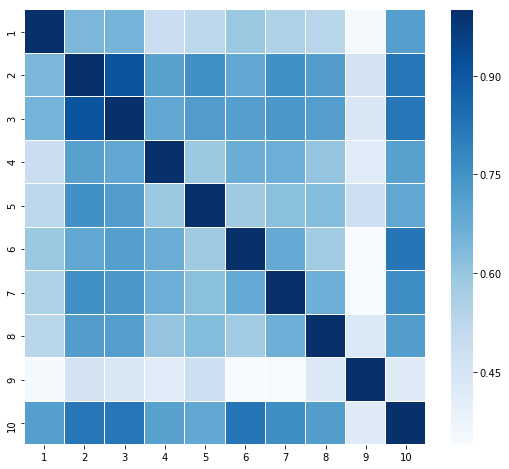

In [240]:
print("\033[94m\033[1mCorrelation Heatmap of the cars-dataset:\x1b[0m")
print("-"*40)
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(Cancer_df.corr(), ax = ax, cmap ="Blues", linewidths = 0.1) 

C:\Users\bkumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\bkumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\bkumar\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


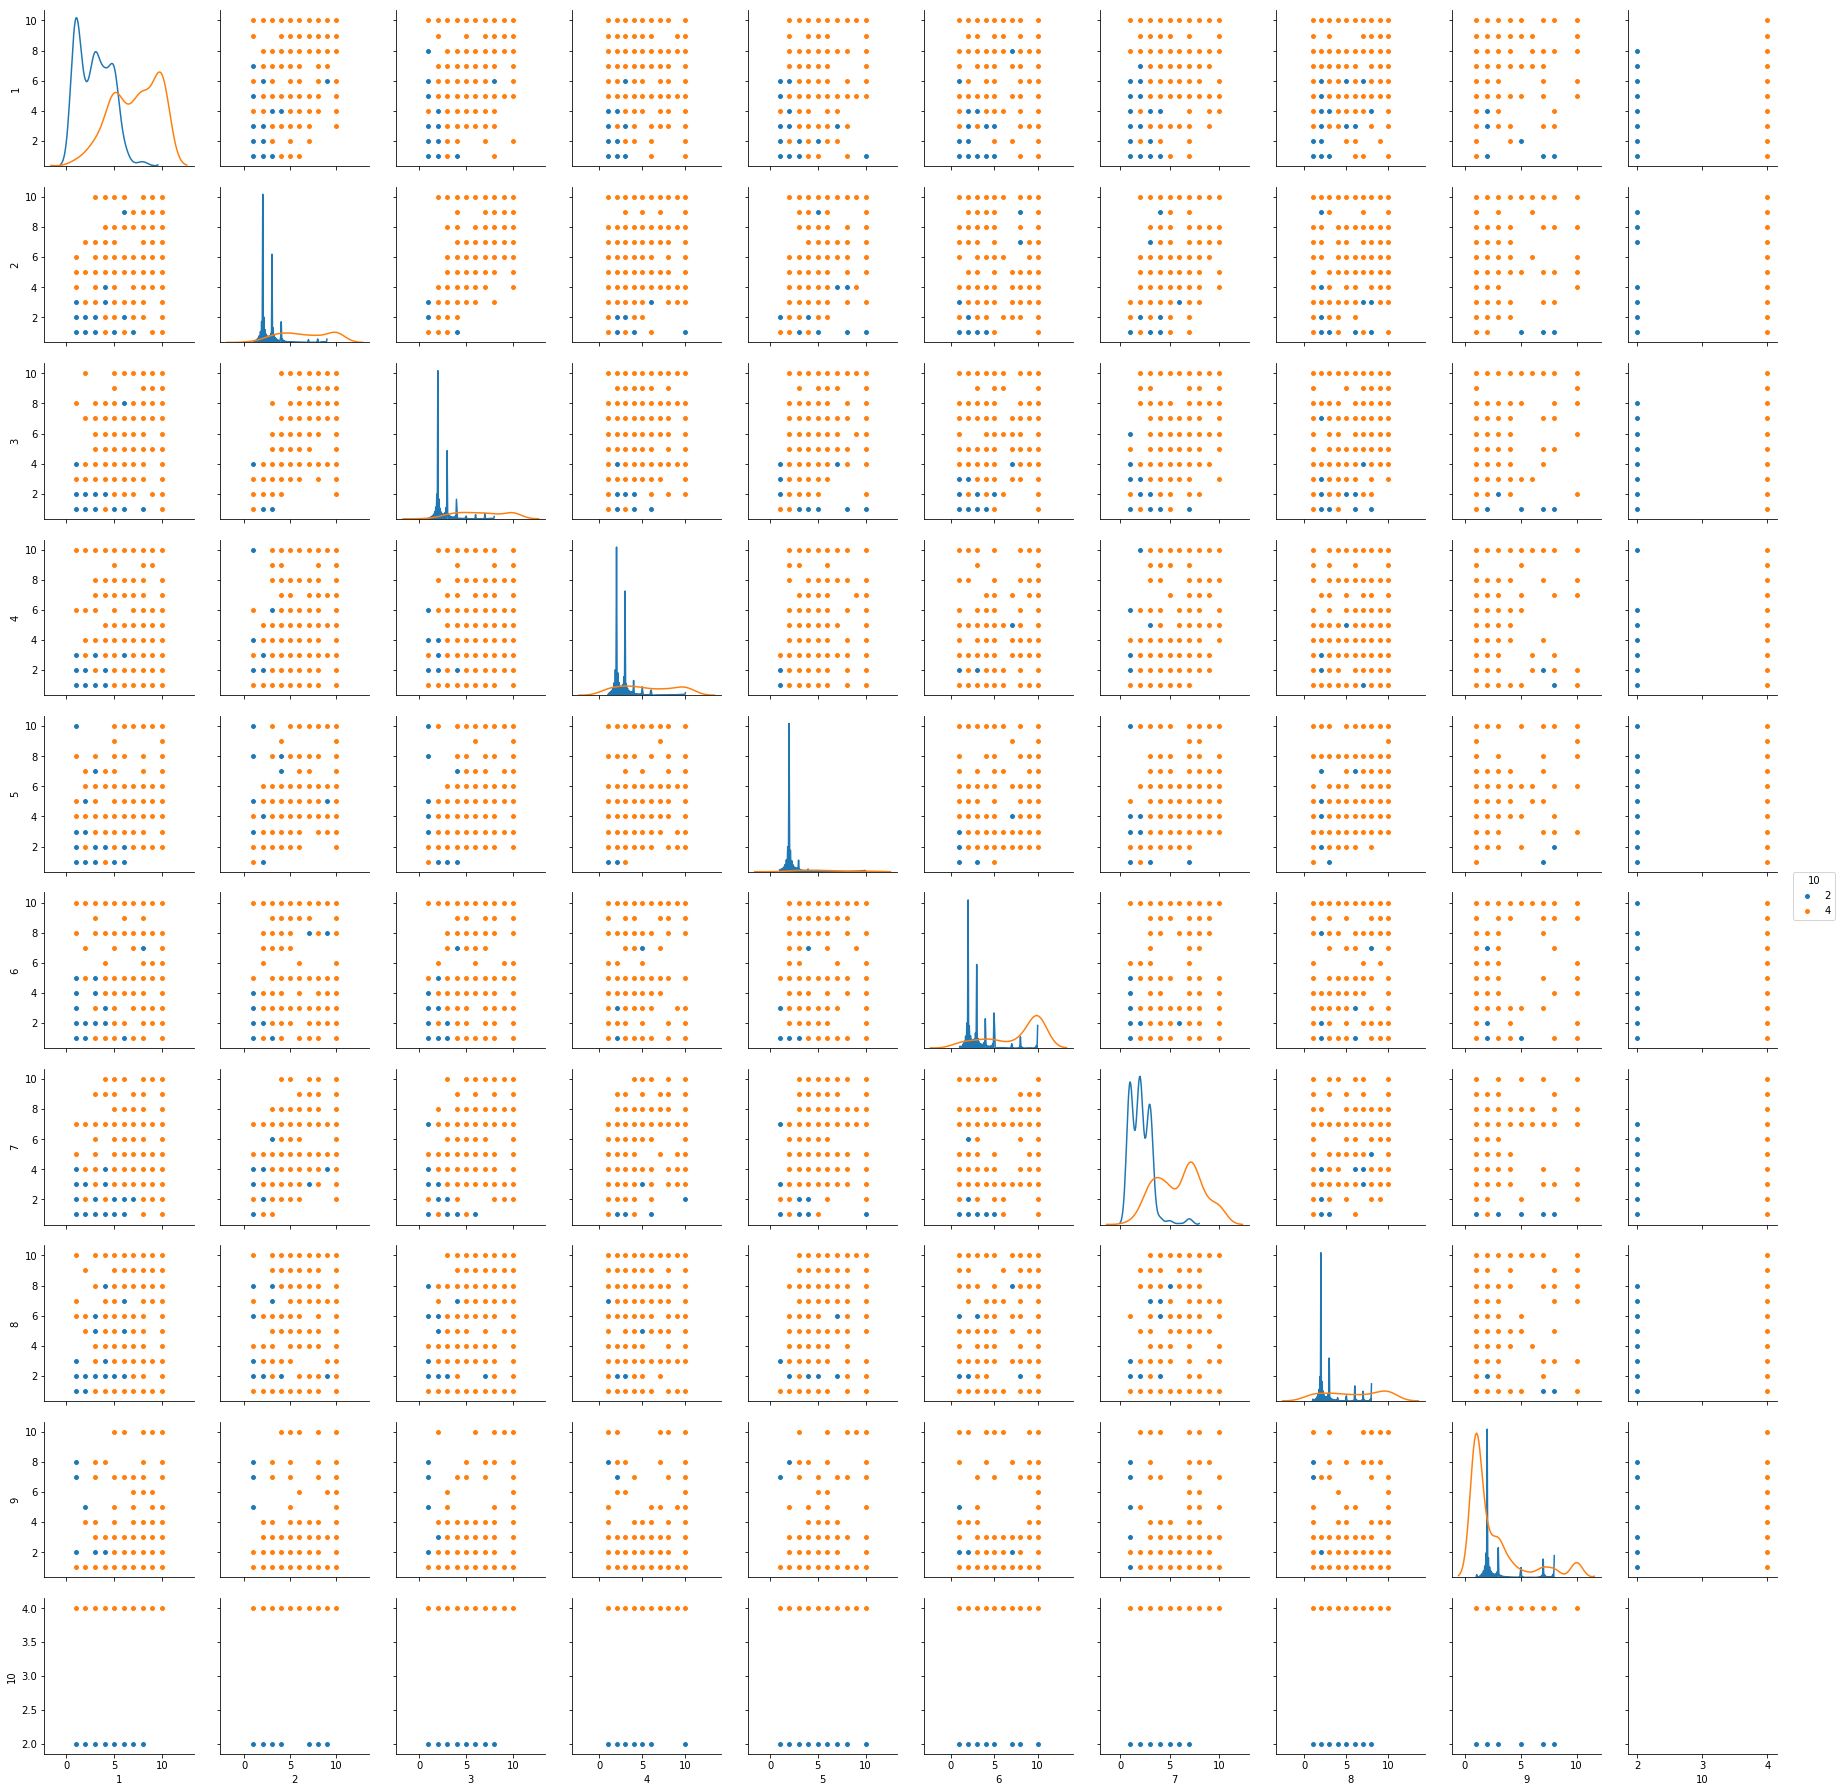

In [241]:
sns.pairplot(Cancer_df, diag_kind='kde', hue = 10)

**Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
and bland chromatin
**Target variable shows high correlation with most of these variables

**Relationship between variables shows come correlation. 
**Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [242]:
Cancer_df = Cancer_df.iloc[:, :9]
Cancer_df.head(1)

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1


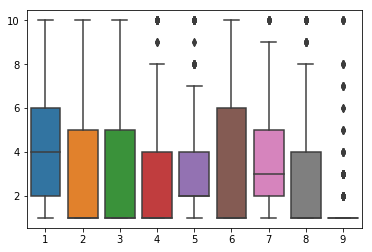

In [243]:
plt.figure()
sns.boxplot( data = Cancer_df)

We could see most of the outliers are not required to remove

In [244]:
from scipy.stats import zscore

In [245]:
Cancer_df_z = Cancer_df.apply(zscore)

# Q6 Create a covariance matrix for identifying Principal components

In [246]:

# PCA
# Step 1 - Create covariance matrix


In [247]:
cov_matrix = np.cov(Cancer_df_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00146628 0.64342355 0.65442815 0.48854401 0.52436377 0.59396107
  0.55455439 0.534849   0.35147177]
 [0.64342355 1.00146628 0.90855848 0.70801357 0.75464892 0.69272299
  0.75666702 0.7204008  0.46143029]
 [0.65442815 0.90855848 1.00146628 0.68695385 0.72352174 0.71492429
  0.73642172 0.71901615 0.44190459]
 [0.48854401 0.70801357 0.68695385 1.00146628 0.59541954 0.67163165
  0.66954737 0.6040054  0.41951256]
 [0.52436377 0.75464892 0.72352174 0.59541954 1.00146628 0.58657495
  0.61903424 0.62984858 0.48128796]
 [0.59396107 0.69272299 0.71492429 0.67163165 0.58657495 1.00146628
  0.68161283 0.58513691 0.33970781]
 [0.55455439 0.75666702 0.73642172 0.66954737 0.61903424 0.68161283
  1.00146628 0.66657749 0.34651824]
 [0.534849   0.7204008  0.71901615 0.6040054  0.62984858 0.58513691
  0.66657749 1.00146628 0.43439328]
 [0.35147177 0.46143029 0.44190459 0.41951256 0.48128796 0.33970781
  0.34651824 0.43439328 1.00146628]]


# Q7 Identify eigen values and eigen vector

In [248]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [249]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.02062573e-01 -1.40800531e-01  8.66372452e-01  2.74743825e-03
   1.07828438e-01  8.03212439e-02 -2.47707288e-01  2.42517517e-01
  -8.51566756e-03]
 [-3.80792973e-01 -4.66403106e-02 -1.99378011e-02  7.33210938e-01
  -2.04255399e-01 -1.45652870e-01  4.36299814e-01  1.39031681e-01
  -2.05434260e-01]
 [-3.77582540e-01 -8.24224677e-02  3.35108706e-02 -6.67480798e-01
  -1.75865604e-01 -1.08391546e-01  5.82726744e-01  7.45271259e-02
  -1.27209198e-01]
 [-3.32723572e-01 -5.20943760e-02 -4.12647341e-01 -4.60192106e-02
   4.93172568e-01 -1.95689775e-02 -1.63434032e-01  6.54628771e-01
   1.23830400e-01]
 [-3.36234038e-01  1.64404385e-01 -8.77425288e-02 -6.68906225e-02
  -4.27383577e-01 -6.36693247e-01 -4.58669096e-01 -6.93089143e-02
   2.11018210e-01]
 [-3.35067511e-01 -2.61260621e-01  6.91477953e-04  7.65102933e-02
   4.98617672e-01 -1.24772942e-01  1.26652879e-01 -6.09220540e-01
   4.02790095e-01]
 [-3.45747366e-01 -2.28076759e-01 -2.13071845e-01 -6.22410470e-02
   1.30473

# Q8 Find variance and cumulative variance by each eigen vector

In [250]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [251]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
print("Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 65.54999277  74.17162483  80.16331638  85.2702881   89.49557508
  92.84975787  96.12089914  99.01796423 100.        ]
Variance Explained [ 65.54999277  74.17162483  80.16331638  85.2702881   89.49557508
  92.84975787  96.12089914  99.01796423 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [252]:
from sklearn.decomposition import PCA
pca = PCA().fit(Cancer_df)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [253]:
pca.components_

array([[ 0.29673577,  0.40397067,  0.39275858,  0.33120214,  0.24973982,
         0.44261347,  0.29207832,  0.35453597,  0.12457633],
       [-0.07350664,  0.22992885,  0.16470098, -0.09819754,  0.20021505,
        -0.78056963,  0.00847974,  0.46919452,  0.18806889],
       [-0.85200897, -0.02627438, -0.07445454,  0.47385846,  0.03165568,
         0.09341837,  0.12241209,  0.13372376,  0.02663127],
       [ 0.04706374,  0.29461882,  0.20651466,  0.39419863,  0.18882266,
        -0.29438441, -0.04122305, -0.75394927,  0.14313933],
       [-0.39976537,  0.33796907,  0.37015092, -0.64249922,  0.19505447,
         0.16867448,  0.09259014, -0.19689024, -0.24962286],
       [-0.09754668, -0.09240845, -0.08733061, -0.18980035,  0.40135442,
         0.25296268, -0.46305857, -0.00420984,  0.70624221],
       [-0.03612583,  0.17495075,  0.34688571,  0.18381614, -0.28345153,
         0.05368932, -0.79596032,  0.15775058, -0.26889348],
       [ 0.08795577, -0.13045578, -0.24226147,  0.12769869,  0

In [254]:
pca_comp_df = pd.DataFrame(pca.transform(Cancer_df))
pca_comp_df.head(1)

,0,1,2,3,4,5,6,7,8
0,-4.482102,0.024023,-1.718432,0.07137,-0.786475,-0.665963,-1.066513,0.049489,-0.020077


# Q10 Find correlation between components and features

In [255]:
pca1 = pd.concat([pca_comp_df.iloc[:,0] , Cancer_df],axis=1, join='inner')
pca2 = pd.concat([pca_comp_df.iloc[:,1] , Cancer_df],axis=1, join='inner')
pca3 = pd.concat([pca_comp_df.iloc[:,2] , Cancer_df],axis=1, join='inner')
pca4 = pd.concat([pca_comp_df.iloc[:,3] , Cancer_df],axis=1, join='inner')
pca5 = pd.concat([pca_comp_df.iloc[:,4] , Cancer_df],axis=1, join='inner')
pca6 = pd.concat([pca_comp_df.iloc[:,5] , Cancer_df],axis=1, join='inner')
pca7 = pd.concat([pca_comp_df.iloc[:,6] , Cancer_df],axis=1, join='inner')
pca8 = pd.concat([pca_comp_df.iloc[:,7] , Cancer_df],axis=1, join='inner')
pca9 = pd.concat([pca_comp_df.iloc[:,8] , Cancer_df],axis=1, join='inner')

In [257]:
print("\033[94m\033[1mCorrelation Matrix of the component # 1 (PCA1 = Labled as 0) and features:\x1b[0m")
print("-"*75)
print(pca1.corr())
print("\033[94m\033[1mCorrelation Matrix of the component # 2 (PCA2 = Labled as 1) and features:\x1b[0m")
print("-"*75)
print(pca2.corr())
print("\033[94m\033[1mCorrelation Matrix of the component # 3 (PCA3 = Labled as 2) and features:\x1b[0m")
print("-"*75)
print(pca3.corr())
print("\033[94m\033[1mCorrelation Matrix of the component # 4 (PCA4 = Labled as 3) and features:\x1b[0m")
print("-"*75)
print(pca4.corr())
print("\033[94m\033[1mCorrelation Matrix of the component # 5 (PCA5 = Labled as 4) and features:\x1b[0m")
print("-"*75)
print(pca5.corr())
print("\033[94m\033[1mCorrelation Matrix of the component # 6 (PCA6 = Labled as 5) and features:\x1b[0m")
print("-"*75)
print(pca6.corr())
print("\033[94m\033[1mCorrelation Matrix of the component # 7 (PCA7 = Labled as 6) and features:\x1b[0m")
print("-"*75)
print(pca7.corr())
print("\033[94m\033[1mCorrelation Matrix of the component # 8 (PCA8 = Labled as 7) and features:\x1b[0m")
print("-"*75)
print(pca8.corr())
print("\033[94m\033[1mCorrelation Matrix of the component # 9 (PCA9 = Labled as 8) and features:\x1b[0m")
print("-"*75)
print(pca9.corr())


Correlation Matrix of the component # 1 (PCA1 = Labled as 0) and features:
---------------------------------------------------------------------------
          0         1         2         3         4         5         6  \
0  1.000000  0.089821  0.070102  0.087141  0.031785  0.054979  0.085306   
1  0.089821  1.000000  0.646360  0.656521  0.485276  0.521577  0.589907   
2  0.070102  0.646360  1.000000  0.904673  0.708354  0.755149  0.695063   
3  0.087141  0.656521  0.904673  1.000000  0.686519  0.722521  0.716973   
4  0.031785  0.485276  0.708354  0.686519  1.000000  0.593798  0.668539   
5  0.054979  0.521577  0.755149  0.722521  0.593798  1.000000  0.584690   
6  0.085306  0.589907  0.695063  0.716973  0.668539  0.584690  1.000000   
7  0.089604  0.555854  0.752076  0.732564  0.671104  0.620012  0.685166   
8  0.062082  0.533290  0.717099  0.715820  0.603229  0.625857  0.584770   
9  0.033082  0.360141  0.475849  0.455326  0.427263  0.488737  0.345721   

          7         8  

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [4]:
jokes_df = pd.read_csv("jokes.csv" , sep="," )
jokes_df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [5]:
ratings_df = jokes_df.iloc[0:200,1:]
ratings_df.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [6]:
ratings_df.columns = range(0,100)
ratings_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,...,2.82,99.0,99.0,99.0,99.0,99.0,-5.63,99.0,99.0,99.0


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [7]:
ratings_df = ratings_df.replace(99.00, 0)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ratings_diff =  sc.fit_transform(ratings_df)     

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [11]:
ratings_diff_df = pd.DataFrame(ratings_diff)
top_joks = ratings_diff_df.mean(axis = 0)
top_joks_df = pd.DataFrame(top_joks)
print("top 10 joke IDs")
top_joks_df.sort_values(0,ascending= False).head(10)

top 10 joke IDs


,0
98,1.840889e-16
81,1.243450e-16
97,1.198694e-16
20,1.065814e-16
94,1.054712e-16
92,8.770762e-17
47,7.771561e-17
73,7.743806e-17
99,7.549517e-17
49,7.494005e-17
